In [1]:
# Mawrer Amed Ramirez Martinez
# Avance de TOG IDI 4
# ms723737@iteso.mx
# Notebook para integrar los multiples CSV files 
# obtenidos de https://www.histdata.com/download-free-forex-historical-data/?/ascii/1-minute-bar-quotes/EURUSD
# en un solo Dataset y realizar resampling

import numpy as np
np.random.seed(1)
import tensorflow
tensorflow.random.set_seed(2)

from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import plotly.graph_objects as go

import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix
import math as m
import os, glob

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#LOAD DATASET for ASK
# change column names
#load Dataset for BID
#change column names

pwd = os.getcwd()
source_data = os.path.join(pwd, r'../../../Datasets/Junio2020/dukas/eurusd/1M/')
filenames = glob.glob(source_data + "/*.*")
filenames.sort()
for file in filenames:
    print(os.path.basename(file))


01_EURUSD_Candlestick_1_M_ASK_31.12.2003-31.12.2005.csv
01_EURUSD_Candlestick_1_M_BID_31.12.2003-31.12.2005.csv
02_EURUSD_Candlestick_1_M_ASK_31.12.2005-31.12.2006.csv
02_EURUSD_Candlestick_1_M_BID_31.12.2005-31.12.2006.csv
03_EURUSD_Candlestick_1_M_ASK_31.12.2006-31.12.2007.csv
03_EURUSD_Candlestick_1_M_BID_31.12.2006-31.12.2007.csv
04_EURUSD_Candlestick_1_M_ASK_31.12.2007-31.12.2010.csv
04_EURUSD_Candlestick_1_M_BID_31.12.2007-31.12.2010.csv
05_EURUSD_Candlestick_1_M_ASK_31.12.2010-31.12.2013.csv
05_EURUSD_Candlestick_1_M_BID_31.12.2010-31.12.2013.csv
06_EURUSD_Candlestick_1_M_ASK_31.12.2013-31.12.2016.csv
06_EURUSD_Candlestick_1_M_BID_31.12.2013-31.12.2016.csv
07_EURUSD_Candlestick_1_M_ASK_31.12.2016-31.12.2019.csv
07_EURUSD_Candlestick_1_M_BID_31.12.2016-31.12.2019.csv
08_EURUSD_Candlestick_1_M_ASK_31.12.2019-31.05.2020.csv
09_EURUSD_Candlestick_1_M_BID_31.12.2019-31.05.2020.csv


In [4]:
print(int(len(filenames)))

16


In [5]:
dateparse = lambda x: pd.datetime.strptime(x, '%d.%m.%Y %H:%M:%S.%f')
DATASET_ASK_01 = pd.read_csv(filenames[1], header=0, parse_dates=['Gmt time'], date_parser=dateparse)
DATASET_ASK_02 = pd.read_csv(filenames[3], header=0, parse_dates=['Gmt time'], date_parser=dateparse)


In [6]:
DATASET_ASK_01 = DATASET_ASK_01.set_index("Gmt time")
DATASET_ASK_02 = DATASET_ASK_02.set_index("Gmt time")


In [7]:
print(DATASET_ASK_01)
print(DATASET_ASK_02)

                        Open     High      Low    Close  Volume
Gmt time                                                       
2004-01-01 00:00:00  1.25934  1.25947  1.25930  1.25947   451.7
2004-01-01 00:01:00  1.25937  1.25938  1.25901  1.25904   658.6
2004-01-01 00:02:00  1.25893  1.25895  1.25881  1.25886   682.2
2004-01-01 00:05:00  1.25894  1.25908  1.25894  1.25905   500.8
2004-01-01 00:06:00  1.25896  1.25905  1.25892  1.25895   234.2
...                      ...      ...      ...      ...     ...
2005-12-30 21:55:00  1.18447  1.18447  1.18424  1.18432   684.1
2005-12-30 21:56:00  1.18442  1.18464  1.18431  1.18464   623.8
2005-12-30 21:57:00  1.18462  1.18464  1.18453  1.18454   359.8
2005-12-30 21:58:00  1.18460  1.18463  1.18449  1.18449   798.3
2005-12-30 21:59:00  1.18460  1.18460  1.18439  1.18439   548.0

[749733 rows x 5 columns]
                        Open     High      Low    Close  Volume
Gmt time                                                       
2006-01-01 22

In [8]:
DATASET_FULL = DATASET_ASK_01.append(DATASET_ASK_02, ignore_index = False)
print(DATASET_FULL.shape)

(1124230, 5)


In [9]:
print(DATASET_FULL)

                        Open     High      Low    Close  Volume
Gmt time                                                       
2004-01-01 00:00:00  1.25934  1.25947  1.25930  1.25947   451.7
2004-01-01 00:01:00  1.25937  1.25938  1.25901  1.25904   658.6
2004-01-01 00:02:00  1.25893  1.25895  1.25881  1.25886   682.2
2004-01-01 00:05:00  1.25894  1.25908  1.25894  1.25905   500.8
2004-01-01 00:06:00  1.25896  1.25905  1.25892  1.25895   234.2
...                      ...      ...      ...      ...     ...
2006-12-31 23:55:00  1.31895  1.31923  1.31894  1.31902   686.6
2006-12-31 23:56:00  1.31910  1.31922  1.31900  1.31915   800.2
2006-12-31 23:57:00  1.31895  1.31912  1.31895  1.31905   655.3
2006-12-31 23:58:00  1.31901  1.31917  1.31894  1.31900  1046.3
2006-12-31 23:59:00  1.31903  1.31915  1.31895  1.31913   641.9

[1124230 rows x 5 columns]


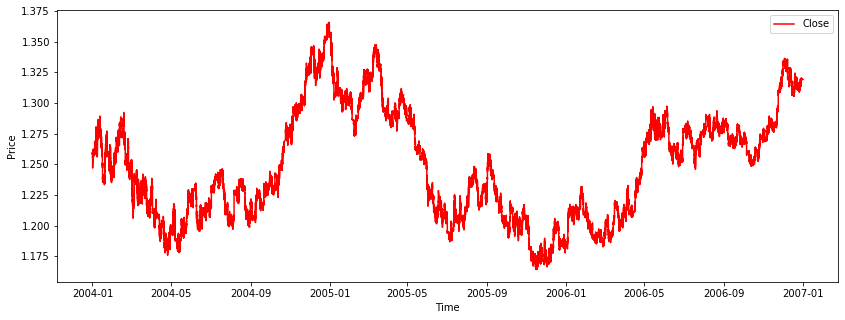

In [10]:
INICIO = 0
FIN = 1124230
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL["Close"][INICIO:FIN], color = 'red', label = 'Close')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [11]:
DATASET_ASK_03 = pd.read_csv(filenames[5], header=0, parse_dates=['Gmt time'], date_parser=dateparse)
DATASET_ASK_03 = DATASET_ASK_03.set_index("Gmt time")

In [12]:
DATASET_ASK_03

,Open,High,Low,Close,Volume
Gmt time,,,,,
2007-01-01 00:00:00,1.31908,1.31919,1.31896,1.31917,931.9
2007-01-01 00:01:00,1.31921,1.31961,1.31914,1.31953,1182.5
2007-01-01 00:02:00,1.31946,1.31961,1.31945,1.31953,999.4
2007-01-01 00:03:00,1.31958,1.31959,1.31940,1.31949,1074.2
2007-01-01 00:04:00,1.31945,1.31960,1.31937,1.31947,1080.6
...,...,...,...,...,...
2007-12-31 23:55:00,1.45839,1.45849,1.45834,1.45849,350.9
2007-12-31 23:56:00,1.45845,1.45849,1.45824,1.45840,295.0
2007-12-31 23:57:00,1.45840,1.45848,1.45829,1.45836,596.3


In [13]:
DATASET_FULL1 = DATASET_FULL.append(DATASET_ASK_03, ignore_index = False)
print(DATASET_FULL1.shape)

(1500031, 5)


In [14]:
DATASET_FULL1

,Open,High,Low,Close,Volume
Gmt time,,,,,
2004-01-01 00:00:00,1.25934,1.25947,1.25930,1.25947,451.7
2004-01-01 00:01:00,1.25937,1.25938,1.25901,1.25904,658.6
2004-01-01 00:02:00,1.25893,1.25895,1.25881,1.25886,682.2
2004-01-01 00:05:00,1.25894,1.25908,1.25894,1.25905,500.8
2004-01-01 00:06:00,1.25896,1.25905,1.25892,1.25895,234.2
...,...,...,...,...,...
2007-12-31 23:55:00,1.45839,1.45849,1.45834,1.45849,350.9
2007-12-31 23:56:00,1.45845,1.45849,1.45824,1.45840,295.0
2007-12-31 23:57:00,1.45840,1.45848,1.45829,1.45836,596.3


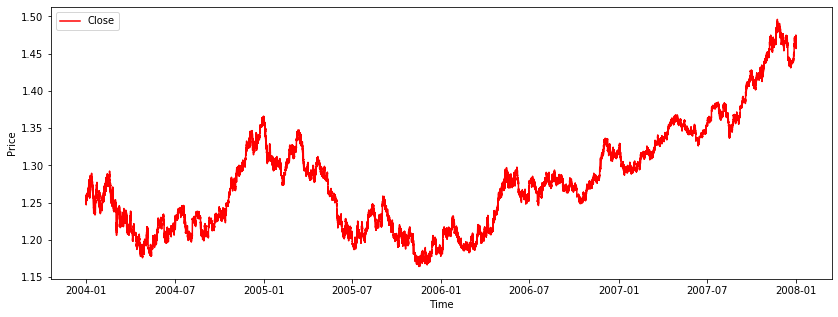

In [16]:
INICIO = 0
FIN = 1500031
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL1["Close"][INICIO:FIN], color = 'red', label = 'Close')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [17]:
DATASET_ASK_04 = pd.read_csv(filenames[7], header=0, parse_dates=['Gmt time'], date_parser=dateparse)
DATASET_ASK_04 = DATASET_ASK_04.set_index("Gmt time")

In [18]:
DATASET_ASK_04

,Open,High,Low,Close,Volume
Gmt time,,,,,
2008-01-01 00:00:00,1.45841,1.45850,1.45828,1.45832,462.15
2008-01-01 00:01:00,1.45827,1.45844,1.45822,1.45844,331.20
2008-01-01 00:02:00,1.45844,1.45844,1.45792,1.45796,630.40
2008-01-01 00:03:00,1.45787,1.45799,1.45770,1.45786,478.70
2008-01-01 00:04:00,1.45792,1.45793,1.45775,1.45792,722.30
...,...,...,...,...,...
2010-12-31 21:55:00,1.33841,1.33841,1.33841,1.33841,1.50
2010-12-31 21:56:00,1.33847,1.33859,1.33810,1.33810,30.19
2010-12-31 21:57:00,1.33817,1.33838,1.33817,1.33838,7.13


In [19]:
DATASET_FULL2 = DATASET_FULL1.append(DATASET_ASK_04, ignore_index = False)
print(DATASET_FULL2.shape)

(2628387, 5)


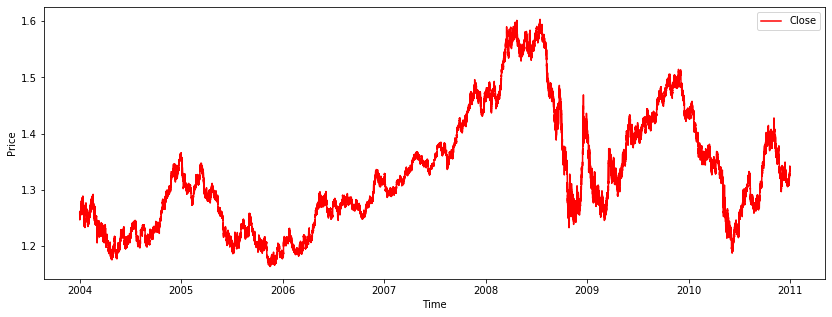

In [20]:
INICIO = 0
FIN = 2628387
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL2["Close"][INICIO:FIN], color = 'red', label = 'Close')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [21]:
DATASET_ASK_05 = pd.read_csv(filenames[9], header=0, parse_dates=['Gmt time'], date_parser=dateparse)
DATASET_ASK_05 = DATASET_ASK_05.set_index("Gmt time")

In [22]:
DATASET_ASK_05

,Open,High,Low,Close,Volume
Gmt time,,,,,
2011-01-02 22:00:00,1.33436,1.33436,1.33424,1.33432,5.70
2011-01-02 22:01:00,1.33448,1.33453,1.33434,1.33434,10.45
2011-01-02 22:02:00,1.33435,1.33435,1.33395,1.33395,7.50
2011-01-02 22:03:00,1.33409,1.33410,1.33409,1.33410,7.58
2011-01-02 22:04:00,1.33411,1.33429,1.33411,1.33429,26.64
...,...,...,...,...,...
2013-12-31 21:56:00,1.37440,1.37458,1.37438,1.37455,28.87
2013-12-31 21:57:00,1.37456,1.37478,1.37446,1.37477,6.88
2013-12-31 21:58:00,1.37471,1.37477,1.37415,1.37416,24.64


In [23]:
DATASET_FULL3 = DATASET_FULL2.append(DATASET_ASK_05, ignore_index = False)
print(DATASET_FULL3.shape)

(3750980, 5)


In [24]:
DATASET_FULL3

,Open,High,Low,Close,Volume
Gmt time,,,,,
2004-01-01 00:00:00,1.25934,1.25947,1.25930,1.25947,451.70
2004-01-01 00:01:00,1.25937,1.25938,1.25901,1.25904,658.60
2004-01-01 00:02:00,1.25893,1.25895,1.25881,1.25886,682.20
2004-01-01 00:05:00,1.25894,1.25908,1.25894,1.25905,500.80
2004-01-01 00:06:00,1.25896,1.25905,1.25892,1.25895,234.20
...,...,...,...,...,...
2013-12-31 21:56:00,1.37440,1.37458,1.37438,1.37455,28.87
2013-12-31 21:57:00,1.37456,1.37478,1.37446,1.37477,6.88
2013-12-31 21:58:00,1.37471,1.37477,1.37415,1.37416,24.64


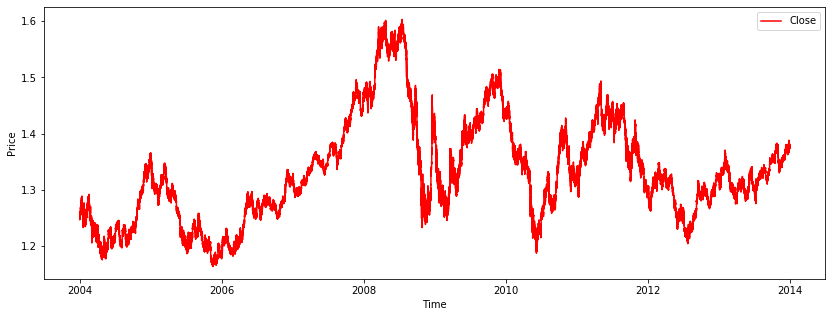

In [25]:
INICIO = 0
FIN = 3750980
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL3["Close"][INICIO:FIN], color = 'red', label = 'Close')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [26]:
DATASET_ASK_06 = pd.read_csv(filenames[11], header=0, parse_dates=['Gmt time'], date_parser=dateparse)
DATASET_ASK_06 = DATASET_ASK_06.set_index("Gmt time")

In [27]:
DATASET_ASK_06

,Open,High,Low,Close,Volume
Gmt time,,,,,
2014-01-01 22:00:00,1.37553,1.37553,1.37552,1.37552,0.25
2014-01-01 22:01:00,1.37553,1.37563,1.37547,1.37547,3.25
2014-01-01 22:02:00,1.37537,1.37557,1.37529,1.37539,5.81
2014-01-01 22:03:00,1.37539,1.37539,1.37528,1.37536,3.11
2014-01-01 22:04:00,1.37536,1.37536,1.37536,1.37536,2.96
...,...,...,...,...,...
2016-12-30 21:55:00,1.05180,1.05187,1.05166,1.05174,112.69
2016-12-30 21:56:00,1.05168,1.05222,1.05151,1.05171,129.01
2016-12-30 21:57:00,1.05171,1.05303,1.05171,1.05275,275.11


In [28]:
DATASET_FULL4 = DATASET_FULL3.append(DATASET_ASK_06, ignore_index = False)
print(DATASET_FULL4.shape)

(4869451, 5)


In [29]:
DATASET_FULL4

,Open,High,Low,Close,Volume
Gmt time,,,,,
2004-01-01 00:00:00,1.25934,1.25947,1.25930,1.25947,451.70
2004-01-01 00:01:00,1.25937,1.25938,1.25901,1.25904,658.60
2004-01-01 00:02:00,1.25893,1.25895,1.25881,1.25886,682.20
2004-01-01 00:05:00,1.25894,1.25908,1.25894,1.25905,500.80
2004-01-01 00:06:00,1.25896,1.25905,1.25892,1.25895,234.20
...,...,...,...,...,...
2016-12-30 21:55:00,1.05180,1.05187,1.05166,1.05174,112.69
2016-12-30 21:56:00,1.05168,1.05222,1.05151,1.05171,129.01
2016-12-30 21:57:00,1.05171,1.05303,1.05171,1.05275,275.11


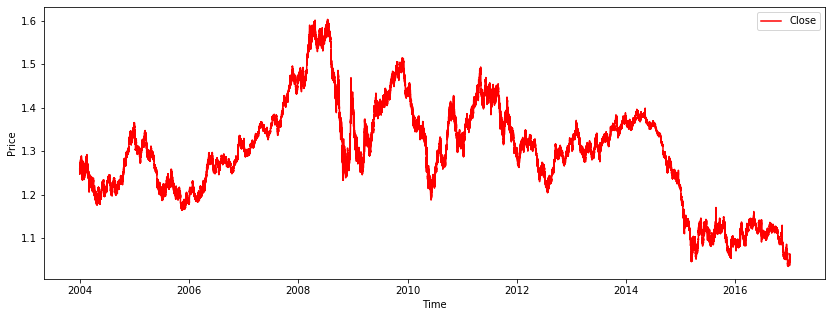

In [30]:
INICIO = 0
FIN = 4869451
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL4["Close"][INICIO:FIN], color = 'red', label = 'Close')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
DATASET_ASK_07 = pd.read_csv(filenames[13], header=0, parse_dates=['Gmt time'], date_parser=dateparse)
DATASET_ASK_07 = DATASET_ASK_07.set_index("Gmt time")

In [32]:
DATASET_ASK_07

,Open,High,Low,Close,Volume
Gmt time,,,,,
2017-01-01 22:00:00,1.05148,1.05153,1.05148,1.05153,2.25
2017-01-01 22:01:00,1.05153,1.05153,1.05153,1.05153,1.50
2017-01-01 22:02:00,1.05170,1.05175,1.05170,1.05175,9.37
2017-01-01 22:03:00,1.05174,1.05175,1.05174,1.05175,0.74
2017-01-01 22:08:00,1.05170,1.05170,1.05170,1.05170,6.00
...,...,...,...,...,...
2019-12-31 21:55:00,1.12117,1.12118,1.12115,1.12118,35.04
2019-12-31 21:56:00,1.12118,1.12120,1.12115,1.12115,21.75
2019-12-31 21:57:00,1.12115,1.12115,1.12105,1.12105,20.95


In [33]:
DATASET_FULL5 = DATASET_FULL4.append(DATASET_ASK_07, ignore_index = False)
print(DATASET_FULL5.shape)

(5989255, 5)


In [34]:
DATASET_FULL5

,Open,High,Low,Close,Volume
Gmt time,,,,,
2004-01-01 00:00:00,1.25934,1.25947,1.25930,1.25947,451.70
2004-01-01 00:01:00,1.25937,1.25938,1.25901,1.25904,658.60
2004-01-01 00:02:00,1.25893,1.25895,1.25881,1.25886,682.20
2004-01-01 00:05:00,1.25894,1.25908,1.25894,1.25905,500.80
2004-01-01 00:06:00,1.25896,1.25905,1.25892,1.25895,234.20
...,...,...,...,...,...
2019-12-31 21:55:00,1.12117,1.12118,1.12115,1.12118,35.04
2019-12-31 21:56:00,1.12118,1.12120,1.12115,1.12115,21.75
2019-12-31 21:57:00,1.12115,1.12115,1.12105,1.12105,20.95


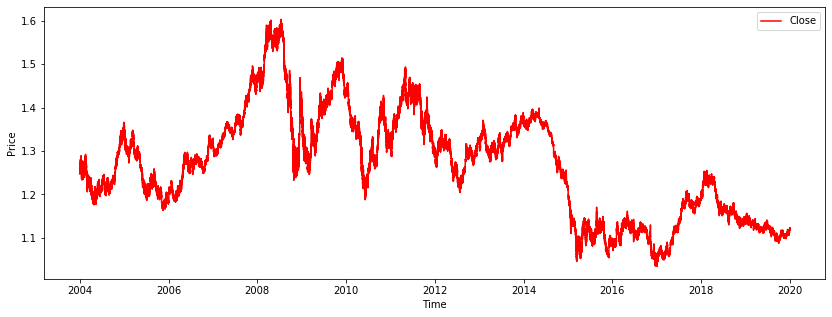

In [35]:
INICIO = 0
FIN = 5989255
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL5["Close"][INICIO:FIN], color = 'red', label = 'Close')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [36]:
DATASET_ASK_08 = pd.read_csv(filenames[15], header=0, parse_dates=['Gmt time'], date_parser=dateparse)
DATASET_ASK_08 = DATASET_ASK_08.set_index("Gmt time")

In [37]:
DATASET_FULL6 = DATASET_FULL5.append(DATASET_ASK_08, ignore_index = False)
print(DATASET_FULL6.shape)

(6144655, 5)


In [38]:
DATASET_FULL6

,Open,High,Low,Close,Volume
Gmt time,,,,,
2004-01-01 00:00:00,1.25934,1.25947,1.25930,1.25947,451.70
2004-01-01 00:01:00,1.25937,1.25938,1.25901,1.25904,658.60
2004-01-01 00:02:00,1.25893,1.25895,1.25881,1.25886,682.20
2004-01-01 00:05:00,1.25894,1.25908,1.25894,1.25905,500.80
2004-01-01 00:06:00,1.25896,1.25905,1.25892,1.25895,234.20
...,...,...,...,...,...
2020-06-01 23:55:00,1.11261,1.11262,1.11256,1.11257,48.46
2020-06-01 23:56:00,1.11259,1.11259,1.11252,1.11253,48.67
2020-06-01 23:57:00,1.11254,1.11254,1.11239,1.11244,93.00


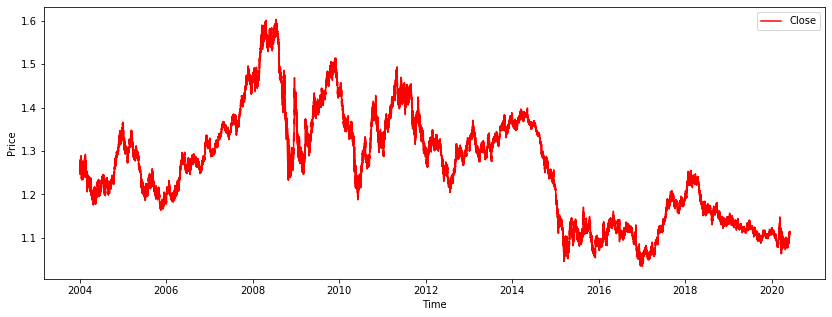

In [39]:
INICIO = 0
FIN = 6144655
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL6["Close"][INICIO:FIN], color = 'red', label = 'Close')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [40]:
pwd = os.getcwd()
source_data = os.path.join(pwd, r'../../../Datasets/Junio2020/dukas/eurusd/1M/FULL/FULL_EURUSD_1M_BID_31.12.2003-31.05.2020.csv')
DATASET_FULL6.to_csv (source_data, index = True, header=True)